In [1]:
using BenchmarkTools, Plots, FFTW, LaTeXStrings

Chapter 4.Filtering in the Frequency Domain
===

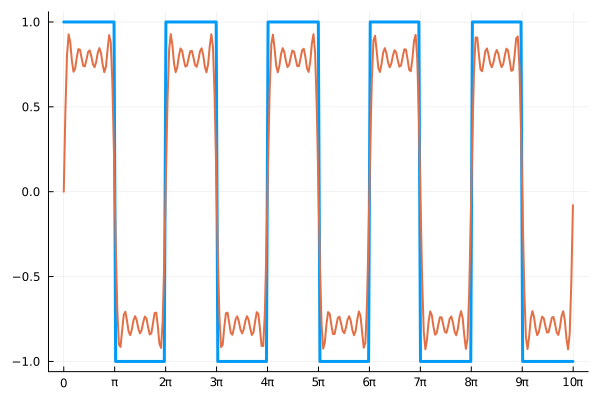

In [3]:
x1 = 0.0:0.1:10*π
y1 = [iseven(round(Int64, xp)) for xp in div.(x1, π)].*2 .- 1
y2 = zeros(Float64, size(y1))
@. y2 = sin(x1)+(1.0/3) * sin(3.0*x1)+(1.0/5) *sin(5.0*x1)+(1.0/7)*sin(7.0*x1)+(1.0/9)*sin(9.0*x1) 
plot(x1, y1, legend=:none, lw=3)
plot!(x1, y2, legend=:none, lw=2, xticks = ([0:π:10*π;], ["0", "\\pi", "2\\pi", "3\\pi", "4\\pi", "5\\pi", "6\\pi", "7\\pi", "8\\pi", "9\\pi", "10\\pi"]))

# 4.2 Sampling

</br>

## Sampling

### 샘플링 함수
연속 함수 $f(t)$ 에 대해 $\Delta T$ 를 주기로 하여 값을 얻어 sampling 했다고 할 때, 샘플링 함수 $\tilde{f}(t)$ 는 다음과 같다.

$$
\tilde{f}(t) = f(t) s_{\Delta T}(t) = \sum_{n=-\infty}^{\infty} f(t) \delta (t-n\Delta T)
$$

</br>

### 샘플링 함수의 푸리에 변환

$f(t)$ 를 $\Delta T$ 주기로 샘플링 한 샘플링 함수 $\tilde{f}(t)$ 의 푸리에 변환은  $\tilde{F}(\mu) = \mathfrak{F}[\tilde{f}(t)]$ 을 생각하자 $f(t)$ 와 $s_{\Delta T}(t)$ 의 푸리에 변환을 각각 $F(\mu),\, S(\mu)$ 라 하면, 

$$
\begin{aligned}
\tilde{F}(\mu) &= \mathfrak{F}[f(t)\, s_{\Delta T}(t)]  = (F \ast S)(\mu) \\
&=\int_{-\infty}^{\infty} F(\eta) \, S(\mu -\eta)\, d\eta \\
&= \dfrac{1}{\Delta T} \sum_{n=-\infty}^{\infty}\int_{-\infty}^{\infty} F(\eta) \, \delta \left(\mu -\eta - \dfrac{n}{\Delta T}\right) \, d\eta \\
&= \dfrac{1}{\Delta T} F \left( \mu - \dfrac{n}{\Delta T} \right)
\end{aligned}
$$

이다. 만약 $f(t)$ 가 연속함수라면 $\tilde{f}(t)$ 는 불연속 함수일지라도 $\tilde{F}(\mu)$ 는 연속함수가 된다.

다음 그림을 보자.


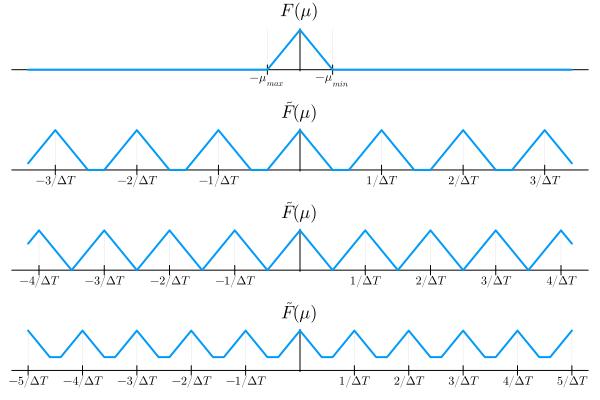

In [4]:
x2 = -10:0.01:10
y2 = (1.2 .- abs.(x2))
y2[y2 .<0.0] .= 0.0
p1 = plot(x2, y2, framestyle = :origin, xticks = ([0, -1.2, 1.2], [L"0", L"-\mu_{max}", L"-\mu_{min}"]), yticks = [], lw=2, legend = :none, title = L"F(\mu)", titlefont = font(12))

xtk = [0,]
xtklb = [L"0", ]

for (i, x0) in zip([1, -1, 2, -2, 3, -3], [3.0, -3.0, 6.0, -6.0, 9.0, -9.0])
    tt = (1.2 .-abs.(x2.-x0))
    tt[tt.<0.0] .= 0.0
    y2 += tt
    push!(xtk, x0)
    push!(xtklb, L"%$i/\Delta T")
end

p2 = plot(x2, y2, framestyle = :origin, yticks = [], lw=2, legend = :none, xticks=(xtk, xtklb), title = L"\tilde{F}(\mu)", titlefont = font(12))

xtk = [0.0,]
xtklb = [L"0", ]

y2 = (1.2 .- abs.(x2))
y2[y2 .<0.0] .= 0.0

for (i, x0) in zip([1, -1, 2, -2, 3, -3, 4, -4], [2.4, -2.4, 4.8, -4.8, 7.2, -7.2, 9.6, -9.6])
    tt = (1.2 .-abs.(x2.-x0))
    tt[tt.<0.0] .= 0.0
    y2 += tt
    push!(xtk, x0)
    push!(xtklb, L"%$i/\Delta T")
end

p3 = plot(x2, y2, framestyle = :origin, yticks = [], lw=2, legend = :none, xticks=(xtk, xtklb), title = L"\tilde{F}(\mu)", titlefont = font(12))

xtk = [0.0,]
xtklb = [L"0", ]

y2 = (1.2 .- abs.(x2))
y2[y2 .<0.0] .= 0.0

for (i, x0) in zip([1, -1, 2, -2, 3, -3, 4, -4, 5, -5], [2.0, -2.0, 4.0, -4.0, 6.0, -6.0, 8.0, -8.0, 10, -10])
    tt = (1.2 .-abs.(x2.-x0))
    tt[tt.<0.0] .= 0.0
    y2 += tt
    push!(xtk, x0)
    push!(xtklb, L"%$i/\Delta T")
end

p4 = plot(x2, y2, framestyle = :origin, yticks = [], lw=2, legend = :none, xticks=(xtk, xtklb), title = L"\tilde{F}(\mu)", titlefont = font(12))

plot(p1, p2, p3, p4, layout = (4, 1))

## Sampling Theorem

위의 그림에서 보듯이 $2\mu_{max} < \dfrac{1}{\Delta T}$ 이면 $\tilde{F}(\mu)$ 로부터 $F(\mu)$ 를 복원할 수 없다. 이 때 $\dfrac{1}{2\Delta T}$ 를 **Niquist rate** 라 한다.


### Sampling theorem 

Frequency 가 $\mu_{max}$ 이하인 신호는 sampling 주기가 $\dfrac{1}{2\mu_{\max}}$ 보다 작은 경우 원래 신호를 복원할 수 있으며 주기가 이보다 클 경우 신호가 왜곡된다. 이렇게 왜곡된 신호를 **aliasing** 이라 한다.

</br>

### Aliased pair

서로 다른 두 연속 함수가 같은 sampling 신호를 가질 경우 이를 **Aliased pair** 라 한다. 아래 그래프에서 "Curve1" 과 "Curve2" 는 aliased pair 이다. Sampling 주기 = 1.25이므로 Nyquist rate = 0.4  이며 Curve 1 의 frequency 는 0.95, Curve 2 의 frequency 는 $0.15$ 이므로 Nyquist rate 가 Curve 1 의 신호의 주파수보다 작기때문에 (이를 **under sampling** 이라 한다) 신호를 제대로 복원 할 수 없다.


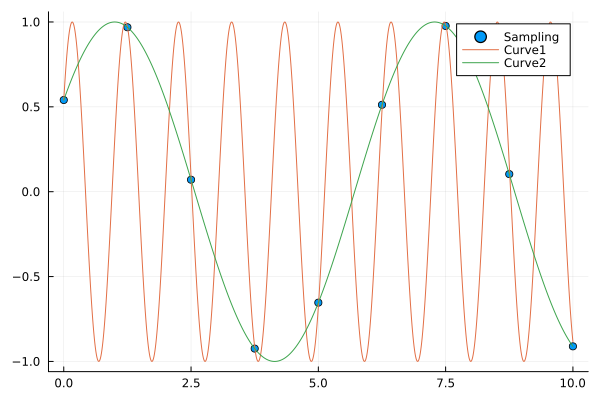

In [5]:
x1 = 0.0:1.25:10.0
y1 = cos.(x1.-1)
scatter(x1, y1, label="Sampling")
x2 = 0.0:0.01:10.0
y2 = cos.(6.02*x2.-1)
plot!(x2, y2, label = "Curve1")
x3 = 0.0:0.01:10.0
y3 = cos.(x2.-1)
plot!(x3, y3, label = "Curve2")


</br>

### Aliaising 은 불가피하다.

실제적으로는 aliasing 은 불가피하다. 원래의 함수가 band-limited 일 지 라도, 우리가 사용하는 함수는 함수의 전 구간이 아닌 특정 구간을 사용하게 되는데, 이 때 infinite frequency component 가 발생한다. 

Band limited function $f(t)$ 에 대해 시간 제한 함수 $h(t)$ 를 생각하자.

$$
h(t) = \left \{ \begin{array}{ll} 1 \qquad & 0 \le t \le T \\ 0 & \text{otherwise} \end{array}\right.
$$

이면,

$$
\begin{aligned}
H(\mu) &= \mathfrak{F}[h(t)] = \dfrac{-1}{2i\pi \mu}[e^{-2i\pi \mu T} -1] = Te^{-i\pi \mu T} \dfrac{\sin (\pi \mu T)}{\pi \mu T}
\end{aligned}
$$

이다. $F = \mathfrak{F}[f]$ 라 하면, 

$$
f(t)h(t) = \mathfrak{F}^{-1} [(F\ast H)(\mu)] 
$$

이다. $F$ 가 band limited 라도 $H(\mu)$ 와 convolution 의 특징에 의해 $F \ast H$ 는 band limited 가 아니게 된다. (Problem 4.12)

</br>

### Anti-aliasing

유한한 범위에서 sampling 된 값을 이용하게 되므로 aliasing 이 불가피함을 알았다. 이것은 입력 신호를 low-pass filter 에 통과시킴으로서 aliasing 의 효과를 감소시킬 수 있다. 이를 **anti-alaisiang** 이라 한다. 이 anti-aliasing 은 sampling 이전에 이루어져야 한다. 

</br>

## 4.3 일변수 DFT

</br>

### 샘플링된 함수의 푸리에 변환으로 부터 DFT

$f(t)$ 에 대해 $\Delta T$ 주기로 샘플링된 $\tilde{f}(t) = \displaystyle \sum_{n=-\infty}^{\infty} f(t) \delta (t-n \Delta T)$ 를 생각하자. $f_n = f(n\Delta T)$ 라 하면, 
$$
\begin{aligned}
\tilde{F}(\mu) &= \int_{-\infty}^\infty  \tilde{f}(t) \, e^{-2i\pi \mu t}\, dt = \int_{-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f(t) \, \delta (t-n\Delta T)\, e^{-2i\pi \mu t\, dt}  =\sum_{n=-\infty}^{\infty} f_n e^{-2i\pi n\Delta T \mu}
\end{aligned}
$$
이다. 

여기서 우리는 $\tilde{F}(\mu)$ 가 $1/\Delta T$ 를 주기로 갖는 주기함수임을 알 수 있다. $0$ 에서 $1/\Delta T$ 까지의 구간을 $M$ 개의 구간으로 나누자. 즉, 
$$
\mu = \dfrac{m}{M\Delta T} \qquad m = 0,\ldots,\, M-1
$$
의 구간에서 $\tilde{F}(\mu)$ 를 sampling 하여
$$
F_m = \sum_{n=0}^{M-1} f_n e^{-2i\pi mn/M}\qquad m =0,\ldots,\,M-1
$$
이라 하자. 